In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
os.chdir("C:/Users/AJAY/Desktop/Data sets")

In [3]:
data=pd.read_csv("t10-crime.csv")
data

C:\Users\AJAY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,﻿INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,03/10/18 20:13,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,30/08/18 20:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,03/10/18 19:20,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,03/10/18 20:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,03/10/18 20:49,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,02/10/18 20:40,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,03/10/18 20:16,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,03/10/18 19:32,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,03/10/18 19:27,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,03/10/18 20:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [4]:
data.columns

Index(['﻿INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

DATA REFINEMENT

In [5]:
data.isnull().sum()

﻿INCIDENT_NUMBER            0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1774
REPORTING_AREA              0
SHOOTING               326765
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   93
STREET                  10977
Lat                     20632
Long                    20632
Location                    0
dtype: int64

In [6]:
mode=data['UCR_PART'].mode()
print(mode)

0    Part Three
dtype: object


In [7]:
data ['UCR_PART'].fillna('Part Three', inplace=True)

In [8]:
mode=data['DISTRICT'].mode()
print(mode)

0    B2
dtype: object


In [9]:
#cols = [0]
#data[cols] = data[cols].fillna(data.mode().iloc[0])
data ['DISTRICT'].fillna('B2', inplace=True)

In [10]:
data.drop(['STREET'],axis=1,inplace=True)

In [11]:
data.drop(['Lat'],axis=1,inplace=True)

In [12]:
data.drop(['Long'],axis=1,inplace=True)

In [13]:
data.drop(['SHOOTING'],axis=1,inplace=True)

In [14]:
data.isnull().sum()

﻿INCIDENT_NUMBER       0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
Location               0
dtype: int64

EXPLORATARY DATA ANALYSIS

In [15]:
data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR
count,327820.000000,327820.000000,327820.000000,327820.000000
mean,2317.961171,2016.598676,6.672213,13.114840
std,1184.990073,1.009775,3.253984,6.292714
min,111.000000,2015.000000,1.000000,0.000000
25%,1001.000000,2016.000000,4.000000,9.000000
50%,2907.000000,2017.000000,7.000000,14.000000
75%,3201.000000,2017.000000,9.000000,18.000000
max,3831.000000,2018.000000,12.000000,23.000000


In [16]:
data.corr()

,OFFENSE_CODE,YEAR,MONTH,HOUR
OFFENSE_CODE,1.000000,0.043738,-0.013767,-0.017109
YEAR,0.043738,1.000000,-0.343858,0.001224
MONTH,-0.013767,-0.343858,1.000000,0.001991
HOUR,-0.017109,0.001224,0.001991,1.000000


In [17]:
data.cov()

,OFFENSE_CODE,YEAR,MONTH,HOUR
OFFENSE_CODE,1.404201e+06,52.335348,-53.085600,-127.577874
YEAR,5.233535e+01,1.019645,-1.129847,0.007775
MONTH,-5.308560e+01,-1.129847,10.588412,0.040767
HOUR,-1.275779e+02,0.007775,0.040767,39.598253


In [18]:
data.head()

,﻿INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,03/10/18 20:13,2018,10,Wednesday,20,Part Two,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,30/08/18 20:00,2018,8,Thursday,20,Part Three,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,03/10/18 19:20,2018,10,Wednesday,19,Part Two,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,03/10/18 20:00,2018,10,Wednesday,20,Part One,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,03/10/18 20:49,2018,10,Wednesday,20,Part Three,"(42.37525782, -71.02466343)"


In [19]:
data.tail()

,﻿INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Location
327815,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,05/06/16 17:25,2016,6,Sunday,17,Part Three,"(42.33695098, -71.08574813)"
327816,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,09/07/15 13:38,2015,7,Thursday,13,Part One,"(42.25592648, -71.12317207)"
327817,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,09/07/15 13:38,2015,7,Thursday,13,Part Three,"(42.25592648, -71.12317207)"
327818,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,31/05/16 19:35,2016,5,Tuesday,19,Part Three,"(42.30233307, -71.11156487)"
327819,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,22/06/15 0:12,2015,6,Monday,0,Part Three,"(42.33383935, -71.08029038)"


In [20]:
data.drop(['﻿INCIDENT_NUMBER'],axis=1,inplace=True)

In [21]:
data[data["UCR_PART"].str.contains("Part Three")]

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Location
1,3201,Property Lost,PROPERTY - LOST,D14,795,30/08/18 20:00,2018,8,Thursday,20,Part Three,"(42.35211146, -71.13531147)"
4,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,03/10/18 20:49,2018,10,Wednesday,20,Part Three,"(42.37525782, -71.02466343)"
6,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,B2,,03/10/18 20:16,2018,10,Wednesday,20,Part Three,"(42.32073413, -71.05676415)"
7,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,03/10/18 19:32,2018,10,Wednesday,19,Part Three,"(42.33380683, -71.10377843)"
9,3410,Towed,TOWED MOTOR VEHICLE,D4,621,03/10/18 20:00,2018,10,Wednesday,20,Part Three,"(42.34886600, -71.08936284)"
10,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,D14,750,03/10/18 19:33,2018,10,Wednesday,19,Part Three,"(42.34432328, -71.15778368)"
12,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,E18,484,03/10/18 17:18,2018,10,Wednesday,17,Part Three,"(42.26059891, -71.10306140)"
13,3115,Investigate Person,INVESTIGATE PERSON,B3,427,03/10/18 8:00,2018,10,Wednesday,8,Part Three,"(42.27986526, -71.08798275)"
14,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,B3,469,03/10/18 19:58,2018,10,Wednesday,19,Part Three,"(42.27791927, -71.09640610)"
15,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,,03/10/18 19:30,2018,10,Wednesday,19,Part Three,"(42.31596119, -71.09042564)"


In [22]:
hour=data['HOUR']
hour

0         20
1         20
2         19
3         20
4         20
5         20
6         20
7         19
8         19
9         20
10        19
11        20
12        17
13         8
14        19
15        19
16        18
17        19
18        18
19        18
20        20
21        19
22        18
23        18
24        18
25         0
26        19
27        17
28         0
29        19
          ..
327790    22
327791    22
327792     9
327793     9
327794     0
327795     0
327796    21
327797    21
327798    21
327799    17
327800    17
327801    10
327802    10
327803    16
327804    18
327805    18
327806     1
327807     1
327808    11
327809    11
327810    12
327811    12
327812    12
327813    14
327814    14
327815    17
327816    13
327817    13
327818    19
327819     0
Name: HOUR, dtype: int64

In [23]:
ucr=data['UCR_PART']
ucr

0           Part Two
1         Part Three
2           Part Two
3           Part One
4         Part Three
5           Part Two
6         Part Three
7         Part Three
8           Part Two
9         Part Three
10        Part Three
11          Part One
12        Part Three
13        Part Three
14        Part Three
15        Part Three
16          Part Two
17          Part Two
18        Part Three
19        Part Three
20        Part Three
21          Part One
22        Part Three
23        Part Three
24          Part One
25          Part Two
26          Part One
27          Part Two
28        Part Three
29        Part Three
             ...    
327790    Part Three
327791      Part One
327792      Part One
327793    Part Three
327794    Part Three
327795      Part One
327796    Part Three
327797      Part Two
327798    Part Three
327799      Part One
327800    Part Three
327801    Part Three
327802      Part One
327803    Part Three
327804      Part Two
327805      Part Two
327806    Par

In [24]:
data.drop(['OFFENSE_CODE'],axis=1,inplace=True)

In [25]:
data.drop(['OFFENSE_CODE_GROUP'],axis=1,inplace=True)

In [26]:
data.drop(['OFFENSE_DESCRIPTION'],axis=1,inplace=True)

In [27]:
data.drop(['REPORTING_AREA'],axis=1,inplace=True)

In [28]:
data.drop(['OCCURRED_ON_DATE'],axis=1,inplace=True)

In [29]:
data.drop(['Location'],axis=1,inplace=True)

In [30]:
data

,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART
0,E18,2018,10,Wednesday,20,Part Two
1,D14,2018,8,Thursday,20,Part Three
2,B2,2018,10,Wednesday,19,Part Two
3,A1,2018,10,Wednesday,20,Part One
4,A7,2018,10,Wednesday,20,Part Three
5,C11,2018,10,Tuesday,20,Part Two
6,B2,2018,10,Wednesday,20,Part Three
7,B2,2018,10,Wednesday,19,Part Three
8,E18,2018,10,Wednesday,19,Part Two
9,D4,2018,10,Wednesday,20,Part Three


In [31]:

data['DAY_OF_WEEK'].replace(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],[1,2,3,4,5,6,7],inplace=True)

In [32]:

data['UCR_PART'].replace(['Part One',"Part Two","Part Three","Other"],[1,2,3,4],inplace=True)

In [33]:

data['DISTRICT'].replace(['B2','C11','D4','A1','B3','C6','D14','E13','E18','A7','E5','A15'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

In [34]:
data

,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART
0,9,2018,10,3,20,2
1,7,2018,8,4,20,3
2,1,2018,10,3,19,2
3,4,2018,10,3,20,1
4,10,2018,10,3,20,3
5,2,2018,10,2,20,2
6,1,2018,10,3,20,3
7,1,2018,10,3,19,3
8,9,2018,10,3,19,2
9,3,2018,10,3,20,3


In [37]:
data.cov()

,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART
DISTRICT,9.585695,0.027604,-0.053577,-0.029235,-0.033708,0.089812
YEAR,0.027604,1.019645,-1.129847,0.000959,0.007775,0.041781
MONTH,-0.053577,-1.129847,10.588412,0.031908,0.040767,-0.041434
DAY_OF_WEEK,-0.029235,0.000959,0.031908,3.864080,-0.526431,0.002066
HOUR,-0.033708,0.007775,0.040767,-0.526431,39.598253,-0.110628
UCR_PART,0.089812,0.041781,-0.041434,0.002066,-0.110628,0.608356


In [39]:
data.describe()

,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART
count,327820.000000,327820.000000,327820.000000,327820.000000,327820.000000,327820.000000
mean,4.754914,2016.598676,6.672213,3.942972,13.114840,2.312245
std,3.096077,1.009775,3.253984,1.965726,6.292714,0.779972
min,1.000000,2015.000000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,2016.000000,4.000000,2.000000,9.000000,2.000000
50%,4.000000,2017.000000,7.000000,4.000000,14.000000,3.000000
75%,7.000000,2017.000000,9.000000,6.000000,18.000000,3.000000
max,12.000000,2018.000000,12.000000,7.000000,23.000000,4.000000


In [38]:
data.corr()

,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART
DISTRICT,1.000000,0.008829,-0.005318,-0.004804,-0.001730,0.037191
YEAR,0.008829,1.000000,-0.343858,0.000483,0.001224,0.053048
MONTH,-0.005318,-0.343858,1.000000,0.004988,0.001991,-0.016325
DAY_OF_WEEK,-0.004804,0.000483,0.004988,1.000000,-0.042558,0.001348
HOUR,-0.001730,0.001224,0.001991,-0.042558,1.000000,-0.022540
UCR_PART,0.037191,0.053048,-0.016325,0.001348,-0.022540,1.000000


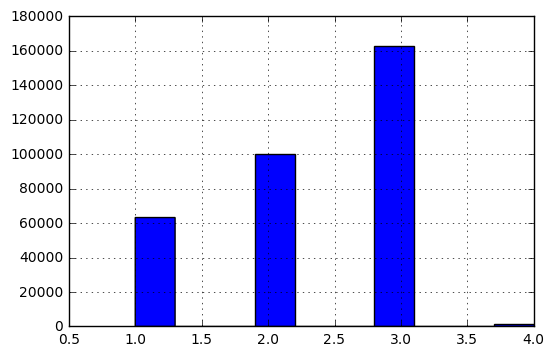

In [35]:
import  matplotlib.pyplot as plt 
%matplotlib inline
data['UCR_PART'].hist(bins=10)

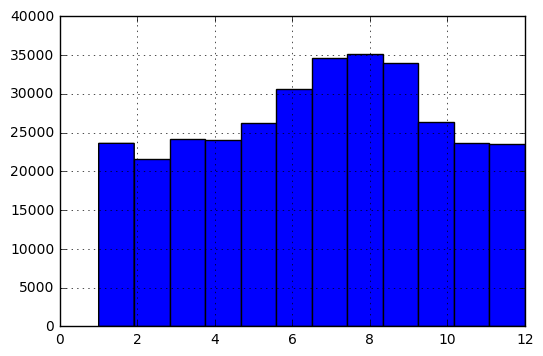

In [36]:

data['MONTH'].hist(bins=12)

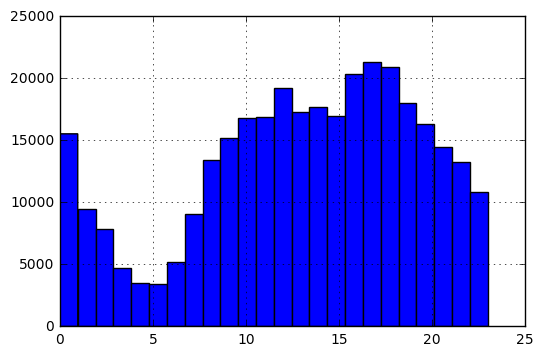

In [37]:

data['HOUR'].hist(bins=24)

C:\Users\AJAY\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1c2c56f16a0>],
 'caps': [<matplotlib.lines.Line2D at 0x1c2c56fbef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c2c57058d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1c2c57009e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1c2c56f1f98>,
  <matplotlib.lines.Line2D at 0x1c2c56fb7f0>]}

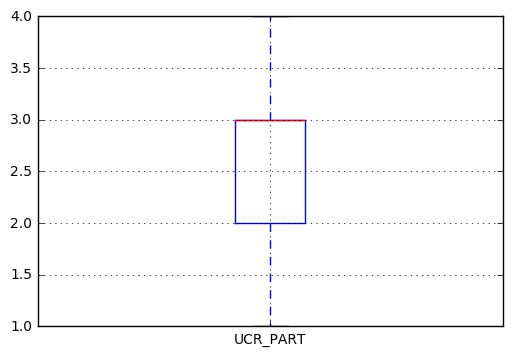

In [38]:
data.boxplot(column='UCR_PART')

In [39]:
data["UCR_PART"].value_counts()

3    163021
2    100283
1     63231
4      1285
Name: UCR_PART, dtype: int64

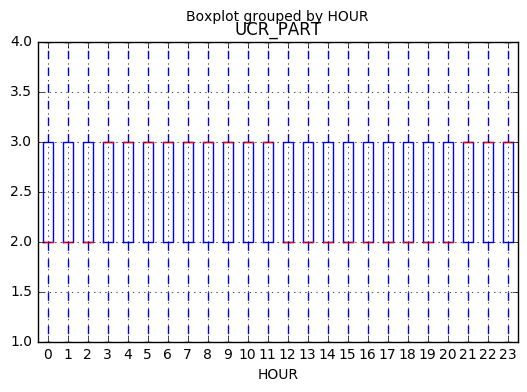

In [40]:
data.boxplot(column="UCR_PART",by='HOUR')

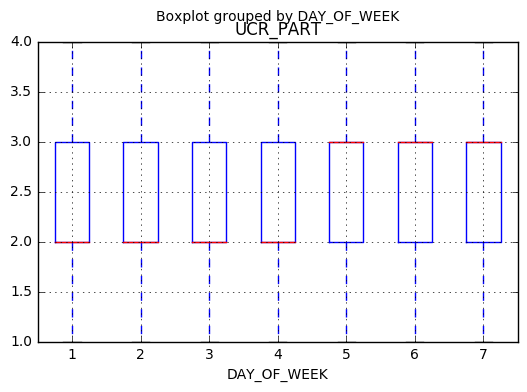

In [41]:
data.boxplot(column="UCR_PART",by='DAY_OF_WEEK')

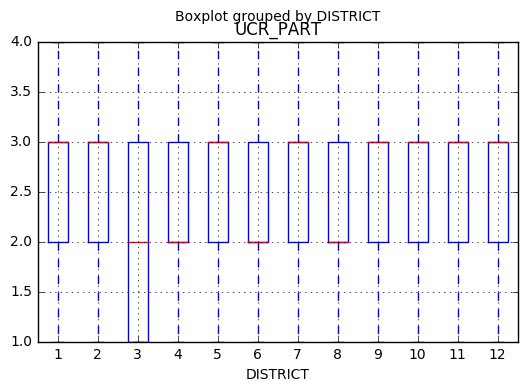

In [42]:
data.boxplot(column="UCR_PART",by='DISTRICT')

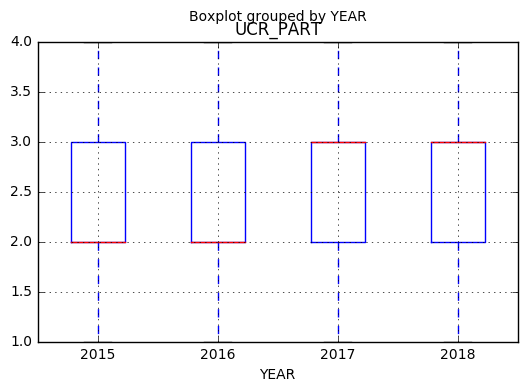

In [43]:
data.boxplot(column="UCR_PART",by='YEAR')

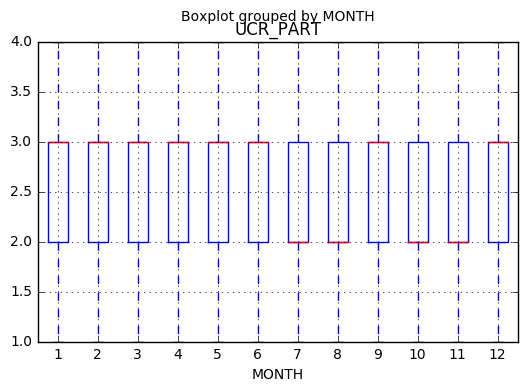

In [44]:
data.boxplot(column="UCR_PART",by='MONTH')

In [45]:
pd.crosstab(data['UCR_PART'],data['DISTRICT'],margins=True)

DISTRICT,1,2,3,4,5,6,7,8,9,10,11,12,All
UCR_PART,,,,,,,,,,,,,
1,9230,6906,12775,8773,5142,4648,4044,3636,2650,2254,1906,1267,63231
2,17286,14009,12355,11430,11470,7469,5412,5401,5151,4422,4024,1854,100283
3,26292,22696,18068,16460,19614,11946,11116,8892,9961,6878,7581,3517,163021
4,254,206,140,72,174,127,60,52,63,80,32,25,1285
All,53062,43817,43338,36735,36400,24190,20632,17981,17825,13634,13543,6663,327820


In [46]:
pd.crosstab(data['UCR_PART'],data['YEAR'],margins=True)

YEAR,2015,2016,2017,2018,All
UCR_PART,,,,,
1,12256,19223,18321,13431,63231
2,17725,30753,29558,22247,100283
3,23246,48790,52620,38365,163021
4,165,368,439,313,1285
All,53392,99134,100938,74356,327820


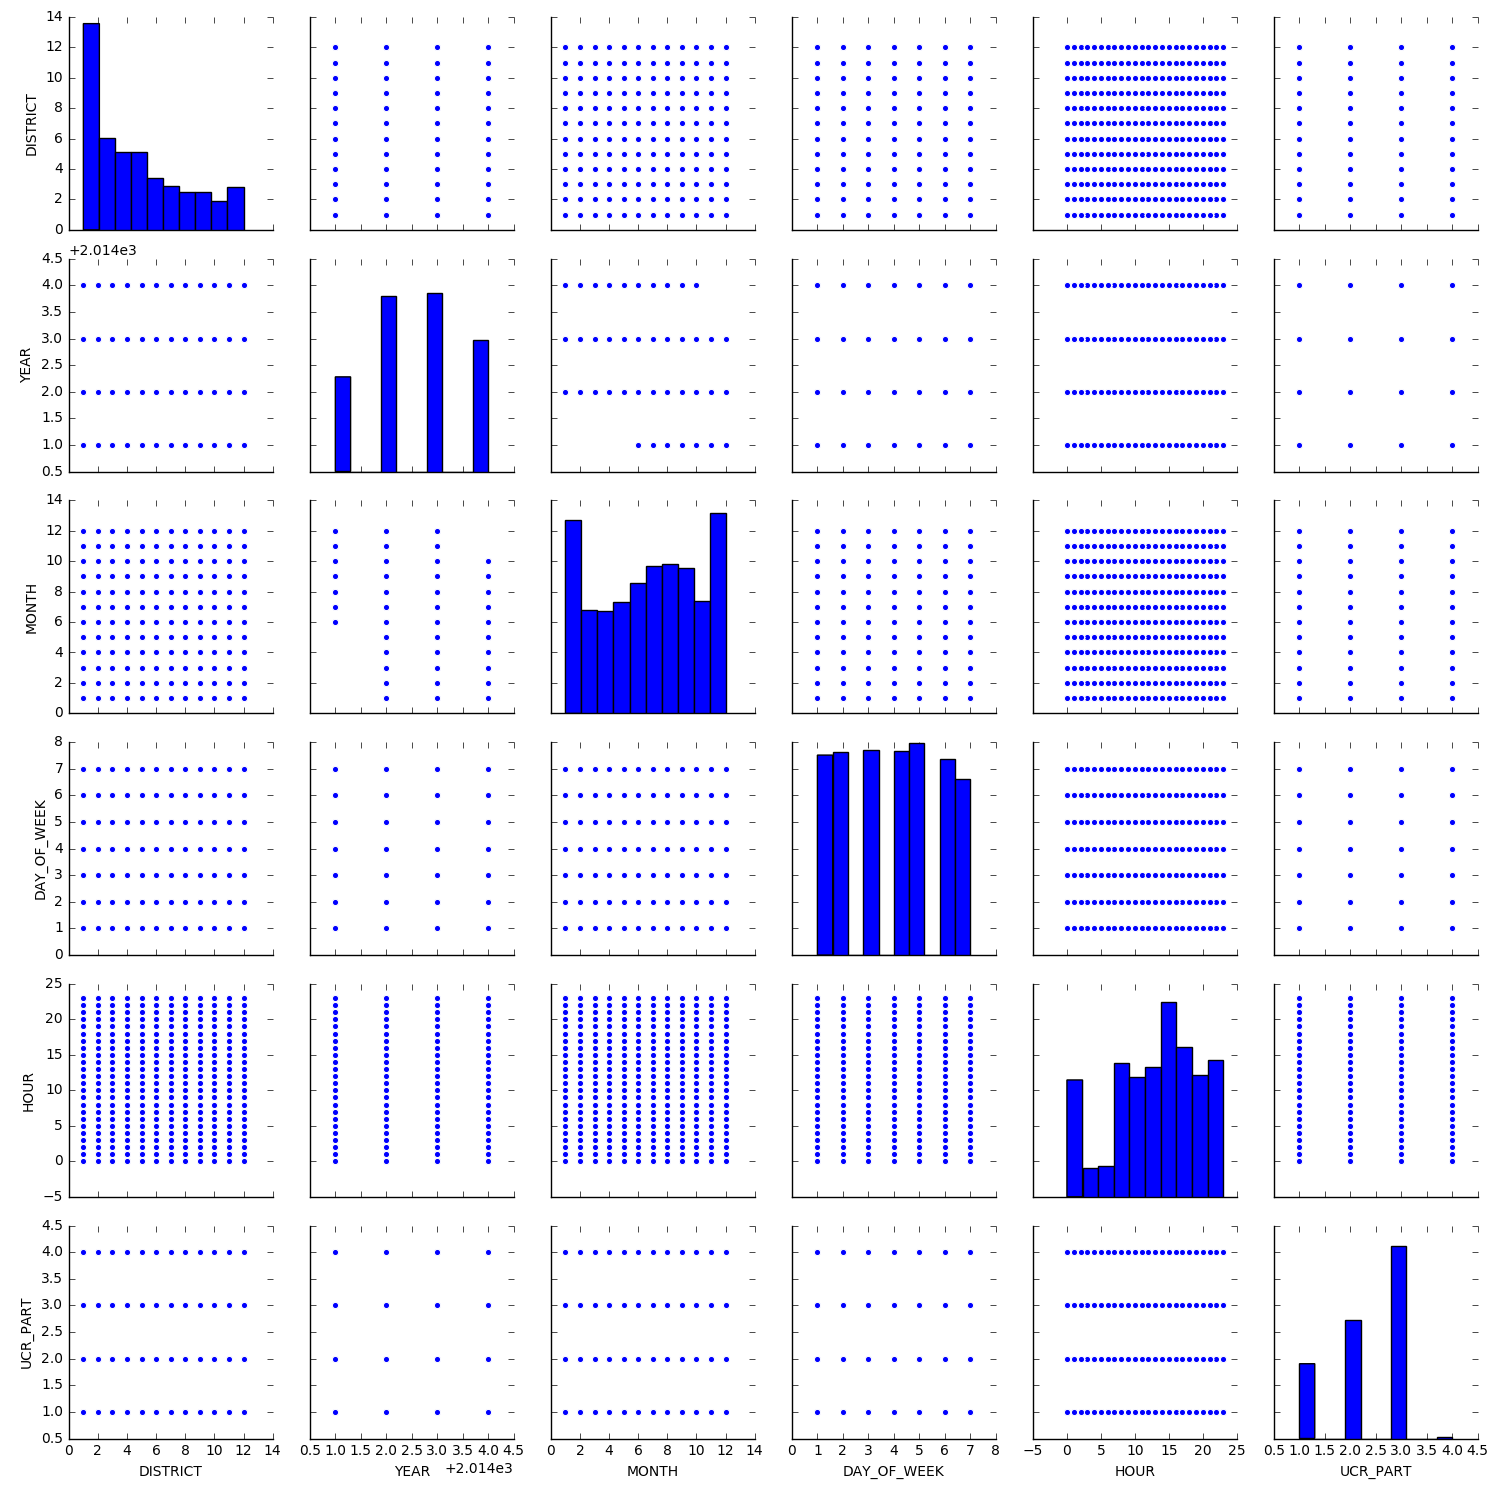

In [90]:
import seaborn as sns
sns.pairplot(data)

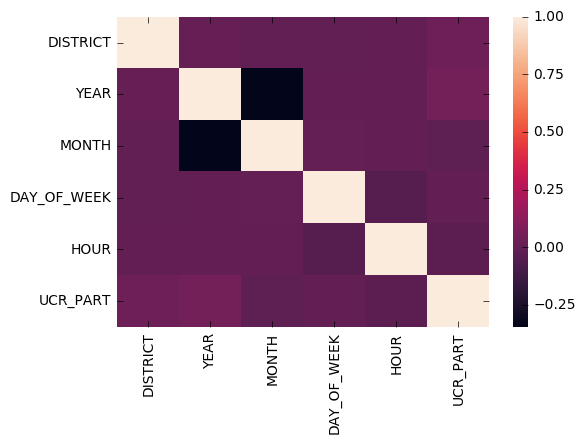

In [91]:
# Plot the correlation usinf heatmap
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

REGRESSION ANALYSIS

LINEAR REGRESSION

In [48]:
x=data['DISTRICT']

In [49]:
y=data['UCR_PART']

In [50]:
from sklearn.cross_validation import train_test_split  #train_test_split splits arrays or matrices into random train and test subsets. 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state =1) 


In [51]:
x_train

315137    11
287557     9
301868     8
5872       1
112420     7
82629      4
250473     2
56734      3
230087     2
237608     9
252054     2
120204     6
325845    11
97519      5
69080      1
92490      5
3974      10
249790     7
136473     5
143330     7
299963     3
285666     3
180521     1
193899     2
153485     3
265655     2
235446    10
139084     1
113636     2
326569     4
          ..
128896     9
199169     1
265750     9
117565    10
299327    12
99335      3
120809    11
296022     2
175582     6
26103      8
148209     4
221143    11
294103     3
92740      2
246322    10
188317     6
282090     3
51668      5
166802     5
176485     1
21758     11
167302     5
293372     4
229520     3
21440      6
117583     2
73349      1
312201     5
267336    11
128037     6
Name: DISTRICT, dtype: int64

In [52]:
x_test

54729      6
5310       5
231253     2
88707      1
233823     1
17131      5
152111     4
65104      8
226265     1
308318     4
128222     9
56521      7
91088      4
263647     7
145628     3
116656     9
213965     1
72475      1
317565     3
316840     3
214846     2
34756      7
204672     2
134454     1
204870     7
262205     5
215999    11
282281     1
30729      4
301666    11
          ..
40592      4
127510     1
9299       3
224257     6
230264     3
312001     3
184701    11
281046     3
3268       2
151812     6
153310     2
88292      4
237976     8
20420      2
43730      7
320140     3
150087     5
184489    11
303727     2
189828     5
215986     2
247178     1
270329     6
247139     3
316161     8
110887     6
94350      4
50784      4
216040     4
249219     7
Name: DISTRICT, dtype: int64

In [53]:
y_test

54729     1
5310      2
231253    2
88707     3
233823    3
17131     3
152111    1
65104     3
226265    1
308318    3
128222    3
56521     3
91088     1
263647    2
145628    2
116656    1
213965    3
72475     1
317565    1
316840    3
214846    3
34756     3
204672    3
134454    3
204870    3
262205    3
215999    3
282281    2
30729     3
301666    3
         ..
40592     1
127510    3
9299      3
224257    3
230264    2
312001    3
184701    1
281046    3
3268      2
151812    1
153310    2
88292     3
237976    3
20420     1
43730     3
320140    3
150087    2
184489    3
303727    3
189828    3
215986    3
247178    1
270329    3
247139    1
316161    2
110887    2
94350     3
50784     1
216040    3
249219    2
Name: UCR_PART, dtype: int64

In [54]:
x_train = x_train.reshape((-1,1))

In [55]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(x_train,y_train) 

In [56]:
accuracy = model.score(x_train, y_train)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.00141535788123


In [57]:
#Print coefficients
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 2.26813727769
slope: [ 0.00948091]


In [58]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
#Predictions from the model
x_test = x_test.reshape((-1,1))
predictions = model.predict(x_test)
print('predicted ucr_part:',predictions, sep = '\n')

predicted ucr_part:
[ 2.32502276  2.31554185  2.28709911 ...,  2.30606093  2.30606093
  2.33450367]


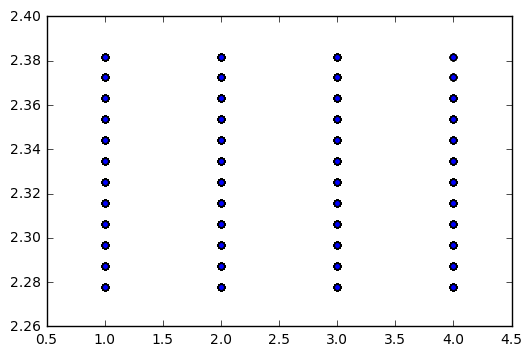

In [60]:
#Visualize the predictions
plt.scatter(y_test, predictions)

In [61]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
x_train = x_train.reshape(-1,1)
y_train_prediction = model.predict(x_train)

x_test = x_test.reshape(-1,1)
y_test_prediction = model.predict(x_test)

In [62]:
# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")

# model evaluation for training set
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y_train, y_train_prediction)))
r2_training = r2_score(y_train, y_train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))#rmse root mean sqaured error 
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y_test, y_test_prediction)))
r2_testing = r2_score(y_test, y_test_prediction)

print("The model performance for testing set")
print("--------------------------------------")
print('Root mean squared error: ', rmse_testing)
print('R2 score: ', r2_testing)

Slope: [ 0.00948091]
Intercept: 2.26813727769


The model performance for training set
--------------------------------------
RMSE is 0.7794203141642139
R2 score is 0.0014153578812303724


The model performance for testing set
--------------------------------------
Root mean squared error:  0.779448693701
R2 score:  0.00132439491854


MULTIPLE LINEAR REGERSSION

In [63]:
X=data[['DISTRICT','YEAR','DAY_OF_WEEK','HOUR']]

In [64]:
Y=data[['UCR_PART']]

In [65]:
X

,DISTRICT,YEAR,DAY_OF_WEEK,HOUR
0,9,2018,3,20
1,7,2018,4,20
2,1,2018,3,19
3,4,2018,3,20
4,10,2018,3,20
5,2,2018,2,20
6,1,2018,3,20
7,1,2018,3,19
8,9,2018,3,19
9,3,2018,3,20


In [66]:
Y

,UCR_PART
0,2
1,3
2,2
3,1
4,3
5,2
6,3
7,3
8,2
9,3


In [67]:
data["DISTRICT"]=data["DISTRICT"].astype(int)

In [68]:
data["UCR_PART"]=data["UCR_PART"].astype(int)

In [69]:
data["YEAR"]=data["YEAR"].astype(int)

In [70]:
data["DAY_OF_WEEK"]=data["DAY_OF_WEEK"].astype(int)

In [71]:
data["HOUR"]=data["HOUR"].astype(int)

In [72]:
import statsmodels.api as sm
model1=sm.OLS(Y,X).fit()
predictions = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UCR_PART   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 7.219e+05
Date:                Fri, 21 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:56:49   Log-Likelihood:            -3.8336e+05
No. Observations:              327820   AIC:                         7.667e+05
Df Residuals:                  327816   BIC:                         7.668e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
DISTRICT        0.0093      0.000     21.264      0.000         0.008     0.010
YEAR            0.0011   2.35e-06    485.817      0.000         0.001     0.001
DAY_OF_WEEK     0.0002      0.001      0.295      0.768        -0.001     0.002
HOUR           -0.0028      0.000    -12.889      0.000        -0.003    -0.002
==============================================================================
Omnibus:                   117633.755   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32104.829
Skew:                          -0.556   Prob(JB):                         0.00
Kurtosis:                       1.945   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# Split data
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state=1)

In [74]:
X_train

,DISTRICT,YEAR,DAY_OF_WEEK,HOUR
91391,6,2017,6,11
208172,3,2016,3,9
313476,1,2015,5,17
125478,5,2017,2,17
125000,1,2017,4,2
251674,7,2016,4,14
155128,7,2017,2,13
137676,4,2017,2,15
292452,3,2015,5,18
25635,12,2018,3,11


In [75]:
Y_train

,UCR_PART
91391,3
208172,3
313476,2
125478,3
125000,1
251674,2
155128,3
137676,1
292452,1
25635,3


In [76]:
# define the data/predictors as the pre-set feature names  
features = X_train.iloc[:,:].values

In [77]:
labels = Y_train.iloc[:].values

In [78]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,Y) 

In [79]:
predictions = model.predict(X)

In [80]:
#Check model accuracy
accuracy=model.score(X,Y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.00467119650735


KNN CLASSIFIER

In [81]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)

C:\Users\AJAY\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [82]:
#Predict on test data
y_pred=clf.predict(X_test)
y_pred

array([3, 2, 1, ..., 2, 2, 2], dtype=int64)

In [83]:
print("Actual y values : ")
print(Y_test.values)

Actual y values : 
[[1]
 [2]
 [2]
 ..., 
 [3]
 [3]
 [2]]


In [84]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(Y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, y_pred) * 100))



Accuracy score: 40.153133
Recall score : 40.153133


C:\Users\AJAY\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


LOGISTIC REGRESSION

In [85]:
#Build a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)


C:\Users\AJAY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
#Build a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)


C:\Users\AJAY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score

print("\nAccuracy score: %f" %(accuracy_score(Y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, y_pred) * 100))



Accuracy score: 40.153133
Recall score : 40.153133


C:\Users\AJAY\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [88]:
#RANDOM FOREST

In [92]:
from sklearn.ensemble import RandomForestClassifier
RFmodel=RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train,Y_train)


C:\Users\AJAY\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [93]:
RFmodel.predict(X_test)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RFmodel.score(X_train,Y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'

      .format(RFmodel.score(X_test,Y_test)))

Accuracy of RF classifier on training set: 0.51
Accuracy of RF classifier on test set: 0.48


# RESULTS

The accuracy of Multiple Linear Regression on test set is:4

The accuracy of KNN classifier on test set is:40 

The accuracy of Logistic regression on test set is:40.15

The accuracy of Random Forest classifier on test set is:51

So, We conclude that the accuracy among KNN,Logistic Regression,Random Forest Classifier the accuracy is greater for Random Forest with an accuracy of  51 percent